In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns

%matplotlib inline

In [2]:
calendar = pd.read_csv('./seattle/calendar.csv')
listings = pd.read_csv('./seattle/listings.csv')
reviews = pd.read_csv('./seattle/reviews.csv')

In [3]:
map = gpd.read_file('./seattle/Seattle_Neighborhoods/Seattle_Neighborhoods.shp')
map

,OBJECTID_1,OBJECTID,AREA,PERIMETER,HOODS_,HOODS_ID,S_HOOD,L_HOOD,L_HOODID,SYMBOL,SYMBOL2,geometry
0,1,1,3.588443e+03,617.843,2,0,OOO,None,0,0,0,"POLYGON ((-122.273978953066 47.6952264724238, ..."
1,2,2,2.229478e+04,733.568,3,0,OOO,None,0,0,0,"POLYGON ((-122.287559786155 47.6452274051207, ..."
2,3,3,5.669537e+04,4088.442,5,0,OOO,None,0,0,0,"POLYGON ((-122.395290858286 47.6651350443469, ..."
3,4,4,6.415681e+04,1809.446,6,0,OOO,None,0,0,0,"POLYGON ((-122.398320785776 47.6660877069821, ..."
4,5,5,2.993164e+03,250.330,7,0,OOO,None,0,0,0,"POLYGON ((-122.288512766251 47.6563002277733, ..."
5,6,6,1.137106e+04,408.586,8,0,OOO,None,0,0,0,"POLYGON ((-122.287254209114 47.6553766177367, ..."
6,7,7,1.315780e+04,474.931,9,0,OOO,None,0,0,0,"POLYGON ((-122.286758460534 47.6550635061759, ..."
7,8,8,2.664951e+03,197.126,10,0,OOO,None,0,0,0,"POLYGON ((-122.283116010196 47.654220976317, -..."
8,9,9,1.773268e+03,184.870,11,0,OOO,None,0,0,0,"POLYGON ((-122.294180037479 47.6535476467066, ..."
9,10,10,1.190226e+05,1688.760,12,0,OOO,None,0,0,0,"POLYGON ((-122.294460654735 47.6534247705368, ..."


In [4]:
area_map = map[['geometry','AREA','OBJECTID_1']]


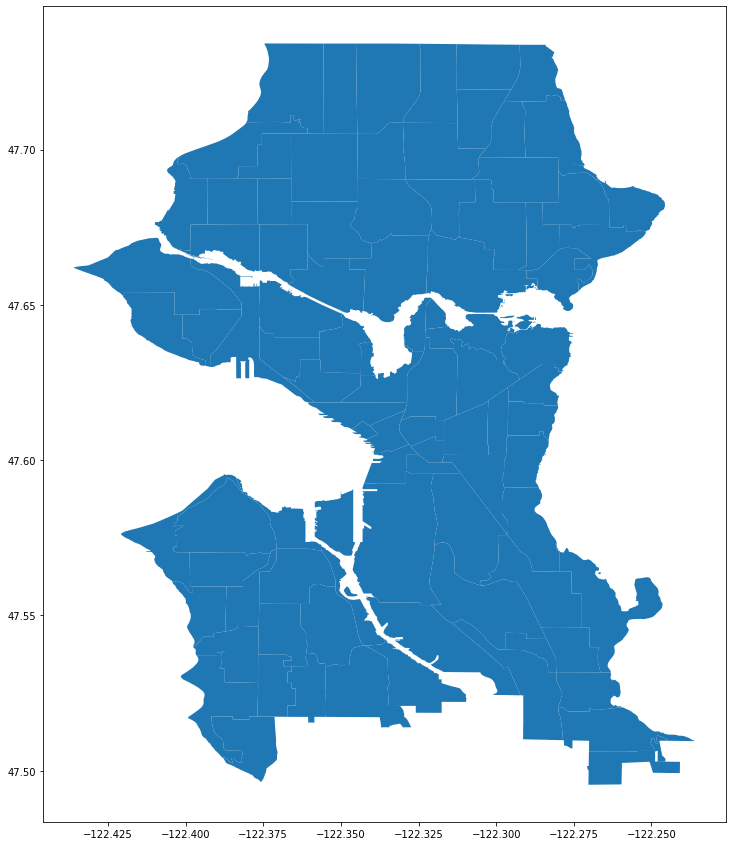

In [5]:
fig,ax = plt.subplots(figsize = (15,15))
map.plot(ax=ax);

In [6]:
geometry = [Point(xy) for xy in zip(listings['longitude'],listings['latitude'])]
crs = {'init':'epsg:4326'}

In [7]:
geo_listings = gpd.GeoDataFrame(listings, crs = crs, geometry = geometry )
geo_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,geometry
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,POINT (-122.3710251999777 47.63628903835718)
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,POINT (-122.3656664643958 47.63912312136253)
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,POINT (-122.3694831756176 47.62972413157735)
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN,POINT (-122.3692791226302 47.63847320176642)
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.89,POINT (-122.3724706340222 47.63291840276724)


In [59]:
airbnb_within_area = gpd.sjoin(geo_listings, area_map, how="inner", op='intersects')
airbnb_within_area['price'] = airbnb_within_area['price'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.float64)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,geometry,index_right,AREA,OBJECTID_1
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,POINT (-122.3710251999777 47.63628903835718),43,17974986.0,44
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,strict,t,t,6,1.48,POINT (-122.3656664643958 47.63912312136253),43,17974986.0,44
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,strict,f,f,2,1.15,POINT (-122.3694831756176 47.62972413157735),43,17974986.0,44
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,flexible,f,f,1,NaN,POINT (-122.3692791226302 47.63847320176642),43,17974986.0,44
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,strict,f,f,1,0.89,POINT (-122.3724706340222 47.63291840276724),43,17974986.0,44
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,f,strict,f,f,1,2.45,POINT (-122.3661740651886 47.63052548240194),43,17974986.0,44
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,f,moderate,f,f,1,2.46,POINT (-122.3685190584494 47.63660544532006),43,17974986.0,44
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,f,strict,t,t,5,4.73,POINT (-122.3758559788577 47.64016054121466),43,17974986.0,44
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,f,strict,f,f,1,1.22,POINT (-122.3572160691403 47.632410299829),43,17974986.0,44
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi.

In [9]:
area_by_name = airbnb_within_area[['neighbourhood','OBJECTID_1']].groupby('neighbourhood')['OBJECTID_1'].apply(list).reset_index(name='neighbourhood_id')

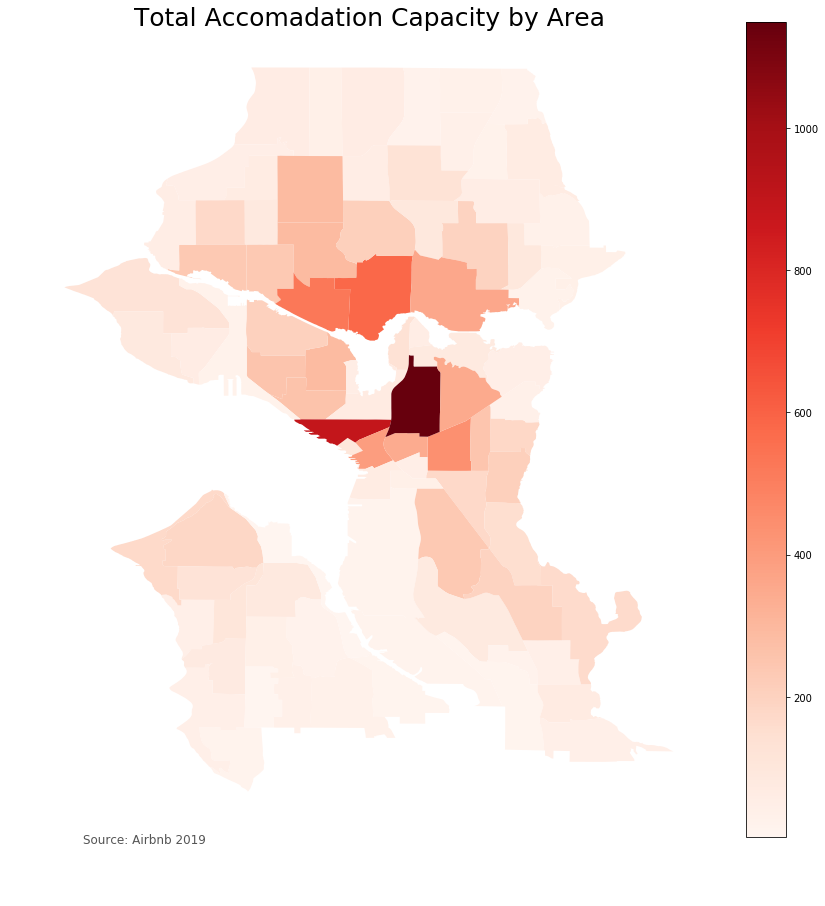

In [31]:
def agg_feat_by_area(df_map, df_feat, feat, colormap, title, agg_type = 'sum'):
    
    if agg_type == 'sum':
        feat_within_area = df_feat[['OBJECTID_1',feat]].groupby('OBJECTID_1', as_index = False).sum()
    if agg_type == 'mean':
        feat_within_area = df_feat[['OBJECTID_1',feat]].groupby('OBJECTID_1', as_index = False).mean()   
        
    feat_map = pd.merge(df_map, feat_within_area, on = 'OBJECTID_1', how = 'inner')
        
    fig,ax = plt.subplots(figsize = (15,15))
    
    feat_map.plot(ax = ax, column = feat, cmap = colormap);
    
    ax.axis('off')
    
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    
    ax.annotate('Source: Airbnb 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    
    vmin, vmax = feat_map[feat].min(), feat_map[feat].max()
    
    sm = plt.cm.ScalarMappable(cmap = colormap, norm = plt.Normalize(vmin=vmin, vmax=vmax))
    
    cbar = fig.colorbar(sm)
    
    return feat_map
    
accommodates_map = agg_feat_by_area(area_map,airbnb_within_area,'accommodates','Reds', 'Total Accomadation Capacity by Area', 'sum')

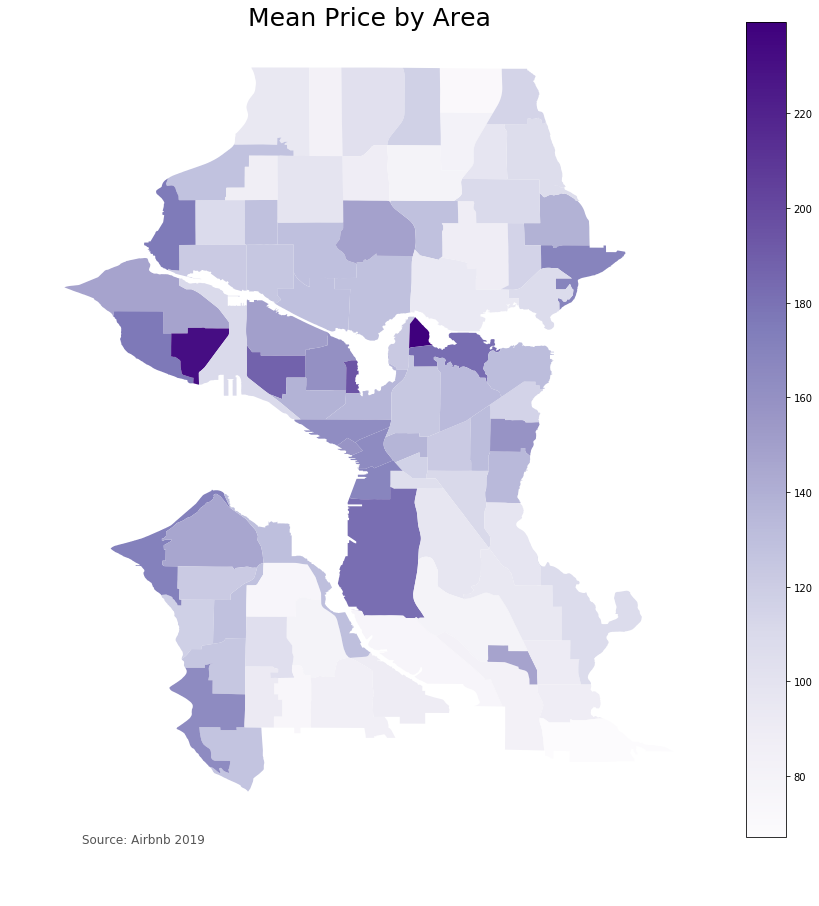

In [29]:
prices_map = agg_feat_by_area(area_map,airbnb_within_area,'price','Purples', 'Mean Price by Area', 'mean')

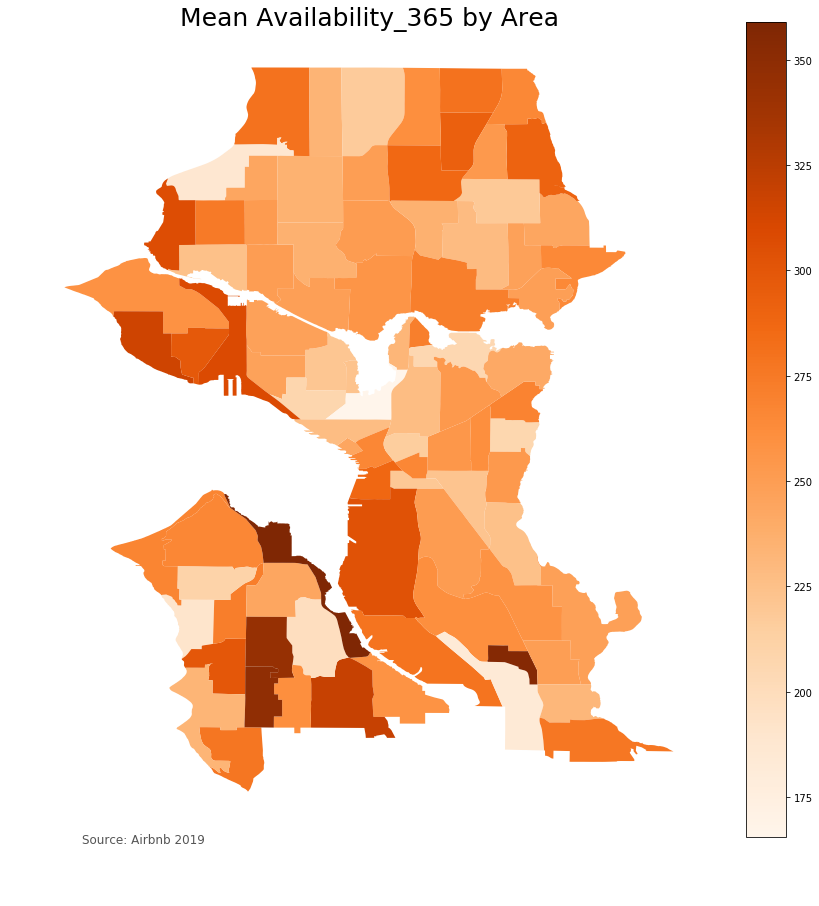

In [35]:
availability_map = agg_feat_by_area(area_map,airbnb_within_area,'availability_365','Oranges', 'Mean Availability_365 by Area', 'mean')

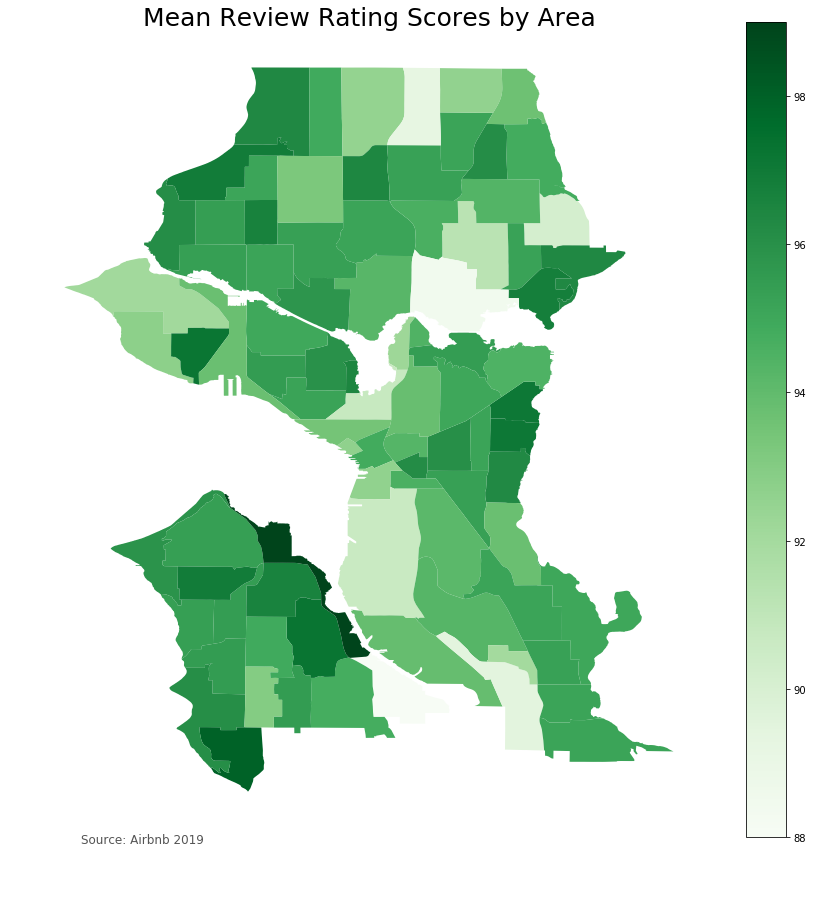

In [42]:
rating_map = agg_feat_by_area(area_map,airbnb_within_area,'review_scores_rating','Greens', 'Mean Review Rating Scores by Area', 'mean')

In [43]:
feat_map = pd.merge(prices_map, accommodates_map[['OBJECTID_1','accommodates']], on = 'OBJECTID_1', how = 'inner')
feat_map = pd.merge(feat_map, availability_map[['OBJECTID_1','availability_365']], on = 'OBJECTID_1', how = 'inner')
feat_map.head()

,geometry,AREA,OBJECTID_1,price,accommodates,availability_365
0,"POLYGON ((-122.376336564281 47.6759176989427, ...",21320656.0,27,109.384615,173,274.865385
1,"POLYGON ((-122.376336564281 47.6759176989427, ...",22431280.0,28,121.671429,238,224.900000
2,"POLYGON ((-122.376336564281 47.6759176989427, ...",14195687.0,29,128.653846,83,252.269231
3,"POLYGON ((-122.376336564281 47.6759176989427, ...",22199366.0,30,124.343750,239,250.140625
4,"POLYGON ((-122.347307566491 47.6650052910614, ...",32123118.0,31,129.520548,292,235.972603


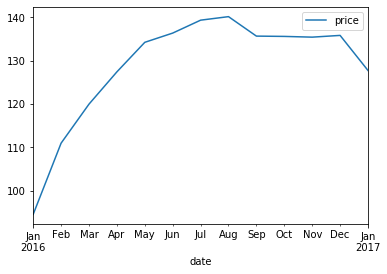

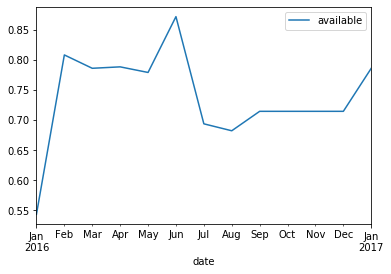

In [95]:
calendar_geo = pd.merge(calendar, airbnb_within_area[['id','OBJECTID_1']], left_on = 'listing_id', right_on ='id',how = 'inner')
calendar_geo['price'] = calendar_geo['price'].apply(lambda x: str(x)).apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.float64)
calendar_geo['available'] = calendar_geo['available'].replace({'t':1,'f':0})
calendar_geo['date'] = pd.to_datetime(calendar_geo['date'], format = '%Y-%m-%d')


def feat_per_area_plot(object_id):
    calendar_geo_area = calendar_geo[calendar_geo.OBJECTID_1 == object_id]
    calendar_geo_area_available = calendar_geo_area[calendar_geo_area.available == 1]
    calendar_geo_area_mean_price_per_month = calendar_geo_area_available[['date','price']].set_index('date').groupby(pd.Grouper(freq='M')).mean()
    calendar_geo_area_mean_price_per_month.plot(kind='line')
    
    calendar_geo_area_mean_vacancy_per_month = calendar_geo_area[['date','available']].set_index('date').groupby(pd.Grouper(freq='M')).mean()
    calendar_geo_area_mean_vacancy_per_month.plot(kind='line')
    
    
    
feat_per_area_plot(54)

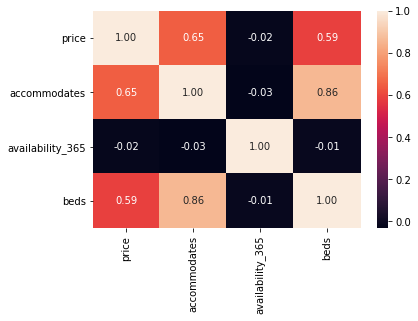

In [55]:
sns.heatmap(airbnb_within_area[['price','accommodates','availability_365','beds']].corr(), annot=True, fmt=".2f");

In [40]:
listings.keys()


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [17]:
listings.instant_bookable

0       f
1       f
2       f
3       f
4       f
5       f
6       f
7       f
8       f
9       f
10      f
11      f
12      f
13      f
14      t
15      f
16      f
17      t
18      f
19      f
20      f
21      f
22      f
23      f
24      f
25      f
26      f
27      f
28      t
29      f
       ..
3788    f
3789    f
3790    t
3791    f
3792    f
3793    t
3794    f
3795    f
3796    t
3797    f
3798    f
3799    f
3800    f
3801    f
3802    f
3803    f
3804    f
3805    f
3806    f
3807    f
3808    f
3809    f
3810    f
3811    f
3812    t
3813    f
3814    f
3815    f
3816    f
3817    f
Name: instant_bookable, Length: 3818, dtype: object

In [41]:
geo_listings.review_scores_rating

0        95.0
1        96.0
2        97.0
3         NaN
4        92.0
5        95.0
6        99.0
7        97.0
8        97.0
9        97.0
10       97.0
11       97.0
12       98.0
13      100.0
14       98.0
15       80.0
16       95.0
17       98.0
18        NaN
19       85.0
20      100.0
21       84.0
22      100.0
23        NaN
24      100.0
25      100.0
26        NaN
27       95.0
28      100.0
29       85.0
        ...  
3788     99.0
3789     90.0
3790     98.0
3791    100.0
3792      NaN
3793     98.0
3794     90.0
3795     98.0
3796     98.0
3797    100.0
3798     98.0
3799     95.0
3800      NaN
3801    100.0
3802      NaN
3803     95.0
3804     95.0
3805     98.0
3806    100.0
3807     97.0
3808     96.0
3809     80.0
3810     92.0
3811    100.0
3812     96.0
3813     80.0
3814    100.0
3815      NaN
3816      NaN
3817      NaN
Name: review_scores_rating, Length: 3818, dtype: float64

In [15]:
listings_copy = listings.copy()

listings_copy['price'] = listings_copy['price'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.float64)


mean_price_by_neighbourhood = listings_copy[['neighbourhood','price']].groupby('neighbourhood').mean()
mean_price_by_neighbourhood

,price
neighbourhood,
Alki,196.652174
Arbor Heights,118.000000
Atlantic,116.280000
Ballard,123.615023
Belltown,166.627451
Bitter Lake,78.846154
Brighton,78.000000
Broadview,102.875000
Broadway,128.400000
